**Auswertung:**

- Band width of setpoint changes, energy consumption and reward should get smaller in the end due to long training with eps = 0.05
- But this did not really happen, instead there is a slight woresning of reward

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [3]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [4]:
import StateUtilities as SU

In [5]:
import visualization_helper_v2 as vh

In [6]:
fig_width = 30

In [7]:
dirnames = ["../checkpoints/b001/",
            "../checkpoints/s308/20210603-1729/",
            "../checkpoints/s308/20210604-1731/"]

In [8]:
alldfs = [ vh.convert_sqlite_to_df(dirname) for dirname in dirnames ]

Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


In [9]:
q_values = vh.load_and_convert_q_values(dirnames)

No Q-value list found for ../checkpoints/b001/.


In [10]:
vh.get_arguments_overview(dirnames)

,b001,s308,s308_3
algorithm,baseline_rule-based,ddqn,ddqn
ddqn_new,0,NaN,NaN
lr,0.01,0.1,0.1
batch_size,128,256,256
lambda_rwd_mstpc,0.1,0.08,0.08
lambda_rwd_energy,5e-06,0.017,0.017
energy_cons_in_kWh,0,1,1
reward_offset,0.0,0.3,0.3
clip_econs_at,0.0,150.0,150.0
target_network_update_freq,3,2,2


In [11]:
vh.get_runtime_overview_df(alldfs, dirnames)

,b001,s308,s308
Number of training episodes,1.0,68741.000000,68880.000000
Runtime in s,0.0,313117.777478,313058.593566
Runtime in h,0.0,86.977160,86.960720
Mean episode runtime in s,0.0,4.555037,4.544985
Mean episode runtime during eval. episode in s,0.0,4.795453,4.775232
Mean episode runtime after eval. episode in s,NaN,4.484908,4.479159
Mean episode runtime in no eval. episode in s,NaN,4.553527,4.543539


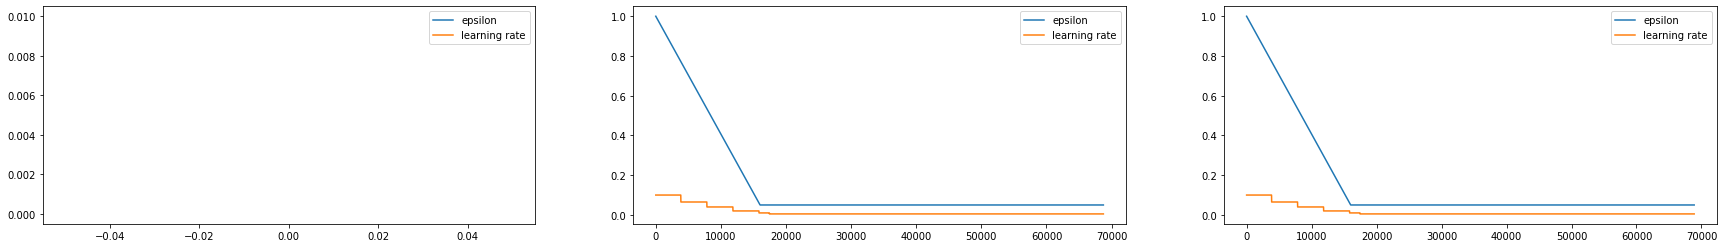

In [12]:
p, _ = vh.complete_plot_epsilon(alldfs, fig_width)
p.show()

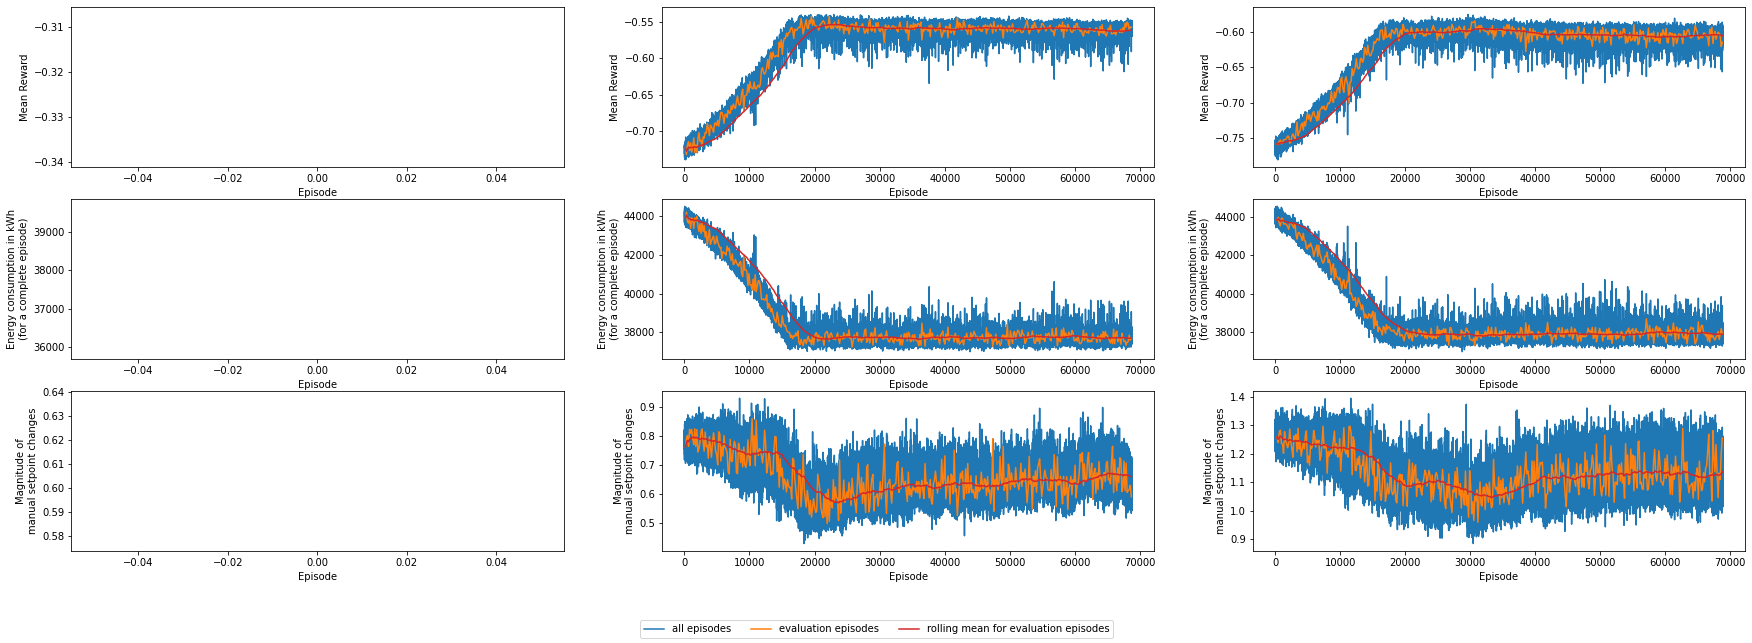

In [13]:
p, _ = vh.complete_plot_reward_stpc_econs(alldfs, fig_width)
p.show()

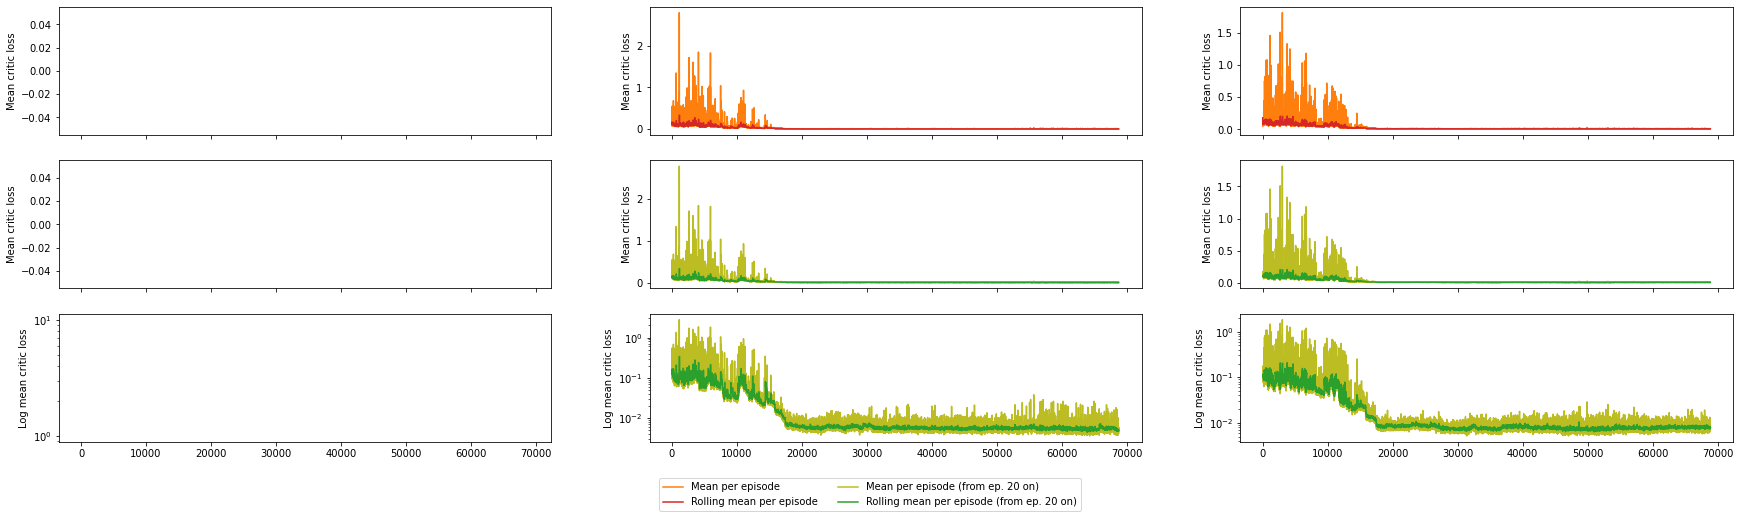

In [14]:
p, _ = vh.complete_plot_losses(alldfs, fig_width, with_agents=False)
p.show()

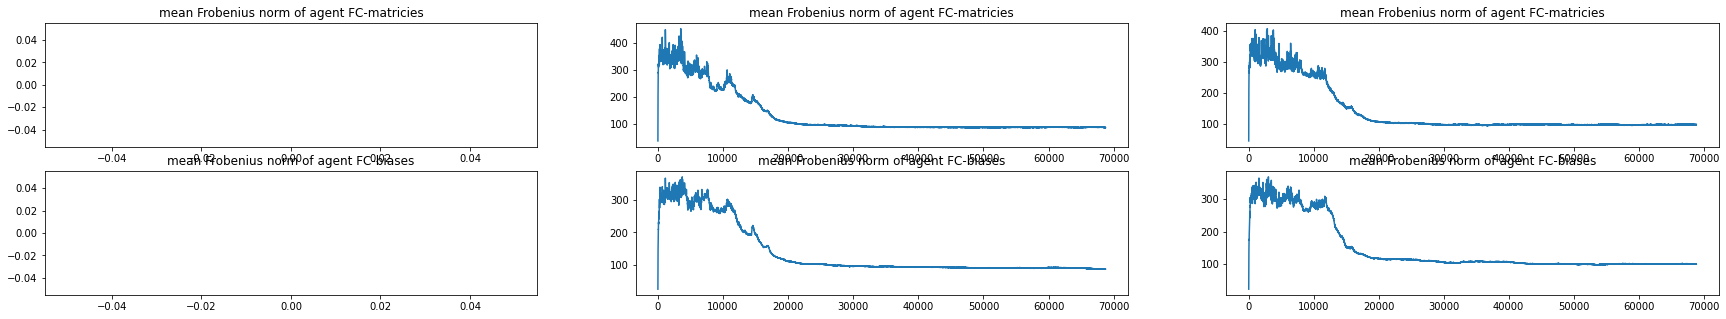

In [15]:
p, _ = vh.complete_plot_frobenius_norms(alldfs, fig_width, with_critics=False)
p.show()

In [16]:
last_available_eval_episodes = vh.compute_last_available_eval_episode(alldfs)

Last available evaluation episode for dfs0:      0
Last available evaluation episode for dfs1:  68639
Last available evaluation episode for dfs2:  68799


<h3>Details for one week</h3>

In [17]:
#selected_episodes = [13120 - 1, 14480 - 1, 14480 - 1]
#selected_weeks    = [datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1)]

In [18]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [19]:
vh.print_reward_informations(subdfs, selected_episodes)

First complete week of evaluation episode
For episode     0: Energy consumption:   37769.46 kWh; Numer of setpoint changes: 436.6112016548903
For episode 68639: Energy consumption:   37699.03 kWh; Numer of setpoint changes: 424.3618225905433
For episode 68799: Energy consumption:   37898.43 kWh; Numer of setpoint changes: 903.0764165647365

Mean values for episode ...
...     0: Reward: -0.32338 kWh; Setpoint change magnit.:  0.60725; Energy cons.: 52530.54541
... 68639: Reward: -0.55767 kWh; Setpoint change magnit.:  0.59021; Energy cons.: 52432.58714
... 68799: Reward: -0.61518 kWh; Setpoint change magnit.:  1.25602; Energy cons.: 52709.91462


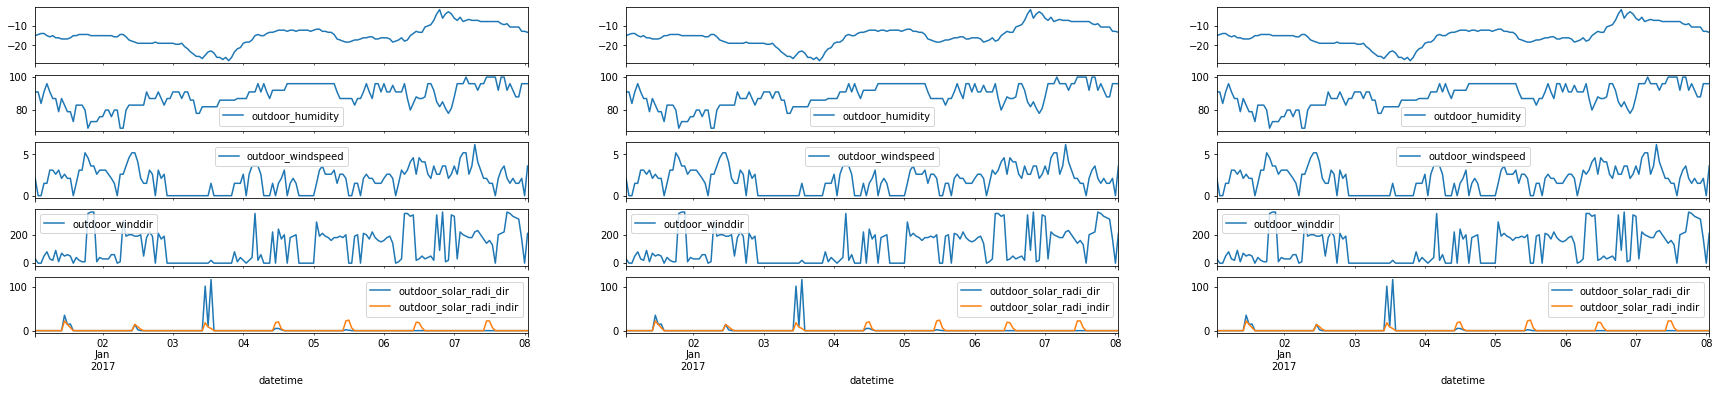

In [20]:
p, _ = vh.complete_plot_weather_information(subdfs, fig_width)
p.show()

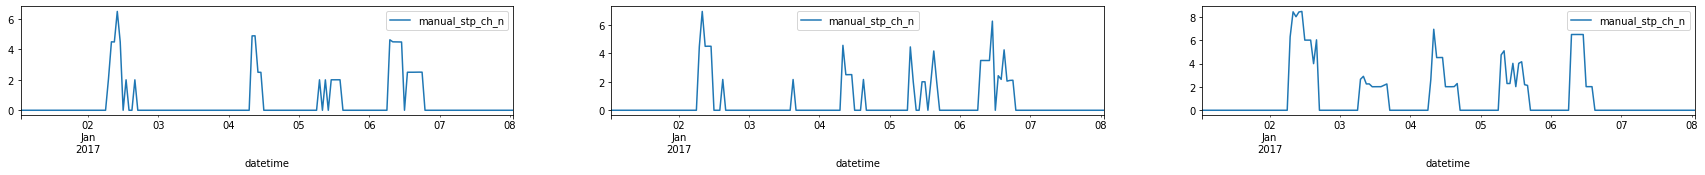

In [21]:
p, _ = vh.complete_plot_number_of_stp_ch(subdfs, fig_width)
p.show()

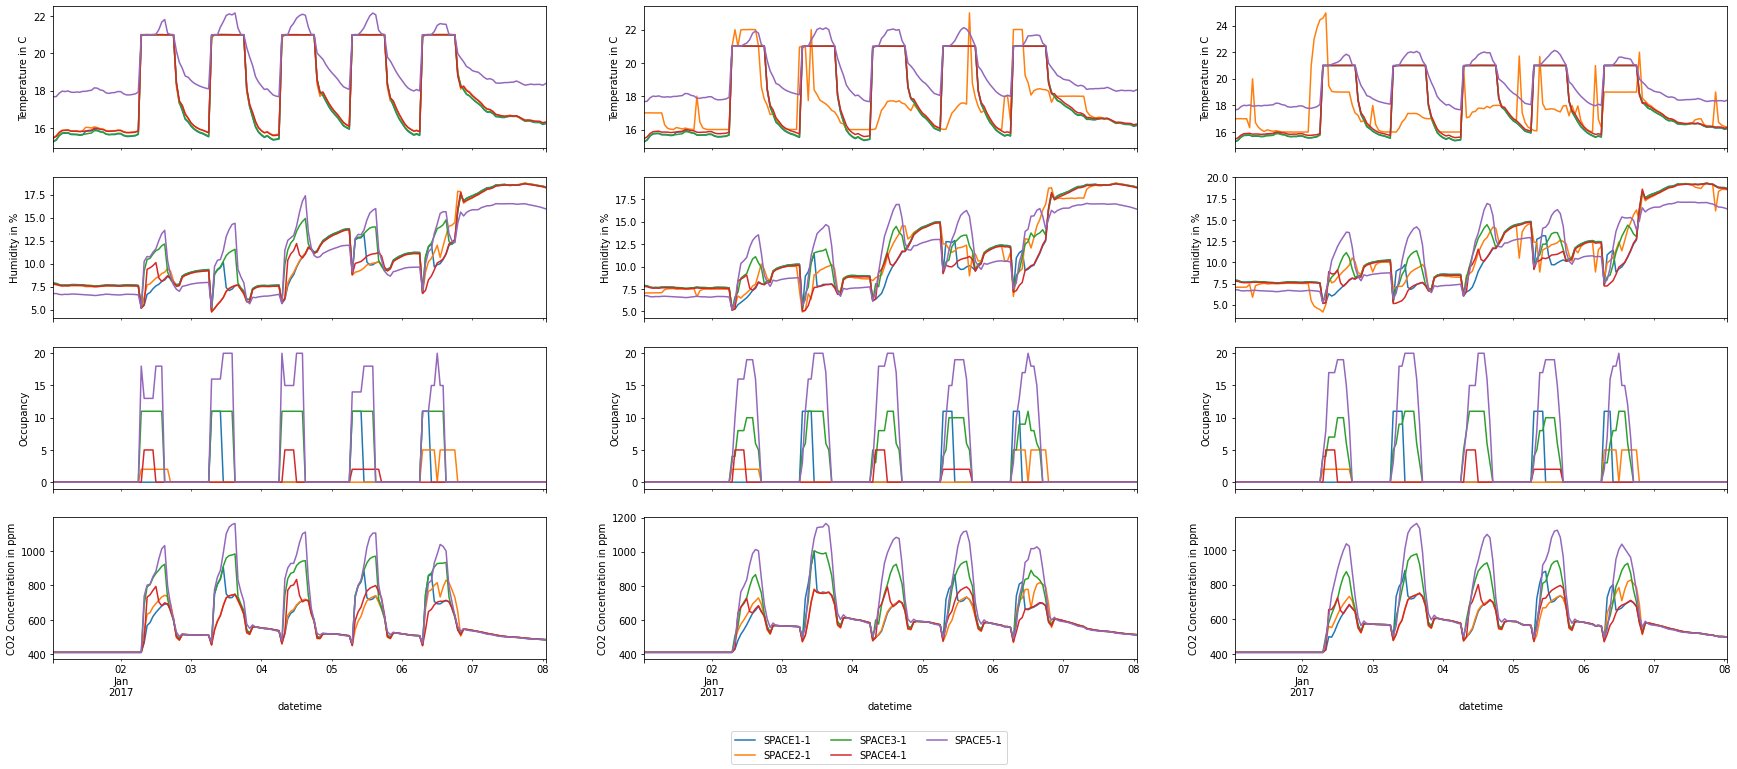

In [22]:
p, _ = vh.complete_plot_room_status(subdfs, fig_width)
p.show()

In [23]:
subdfs_rooms, subdfs_agents = vh.get_available_rooms_and_agents(subdfs)

Available Rooms     in (sub-)dfs0: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs0: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs1: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs1: {'SPACE2-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE3-1': 3, 'SPACE1-1': 4} 

Available Rooms     in (sub-)dfs2: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs2: {'SPACE2-1': 0, 'SPACE5-1': 1, 'SPACE4-1': 2, 'SPACE3-1': 3, 'SPACE1-1': 4} 



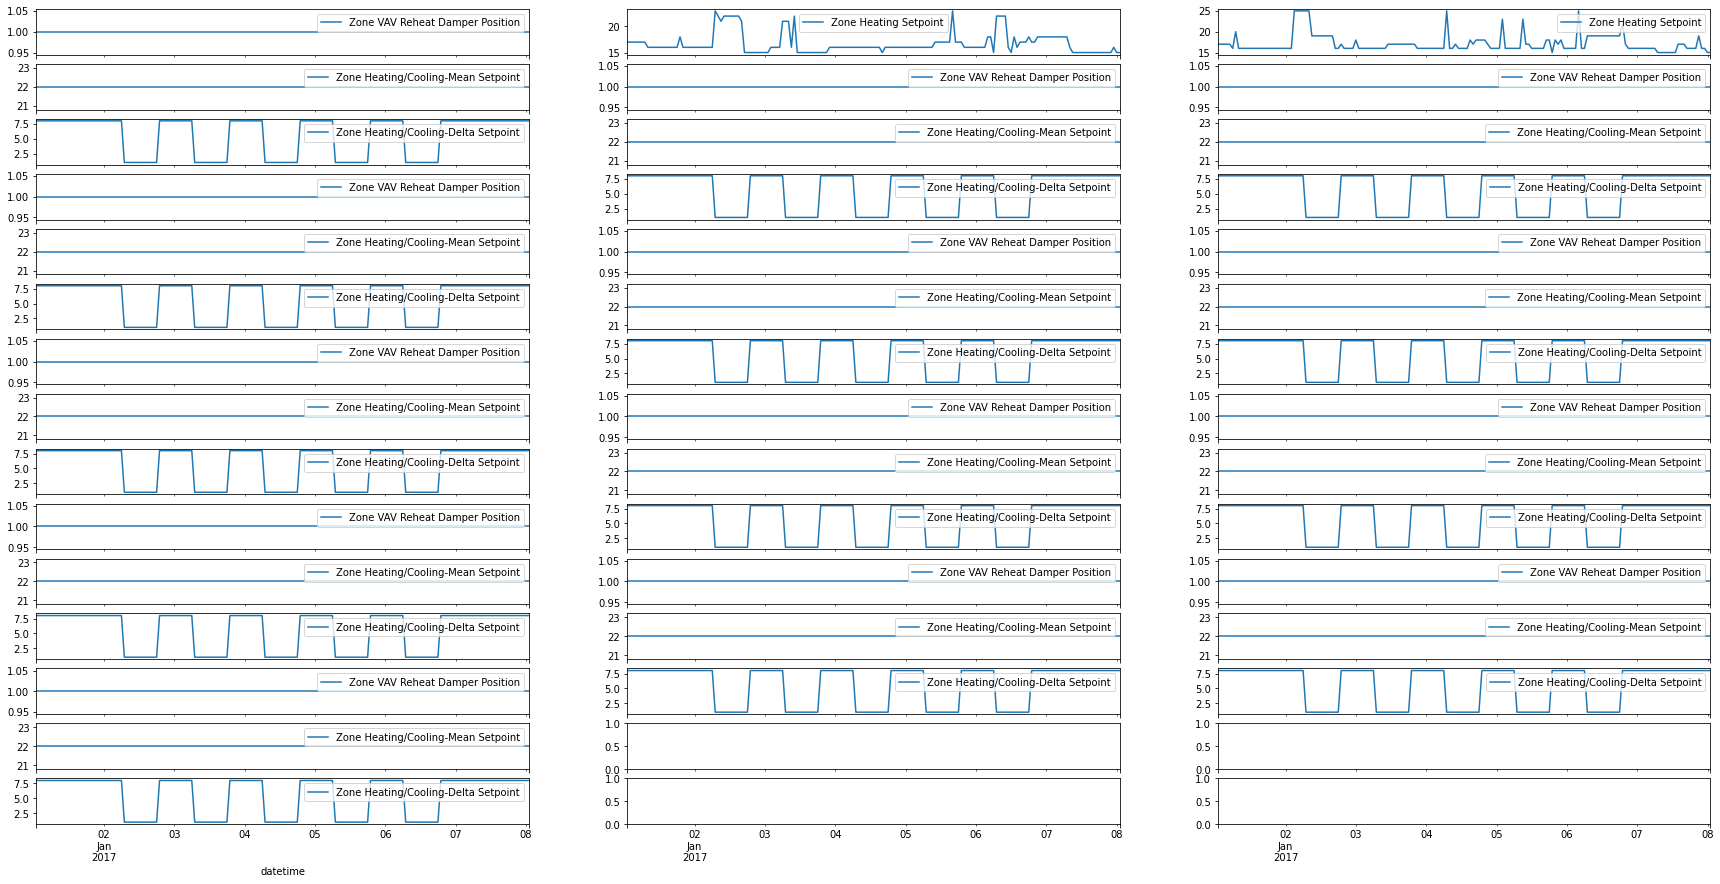

In [24]:
p, _ = vh.complete_plot_all_agent_outputs(subdfs, fig_width, subdfs_agents)
p.show()

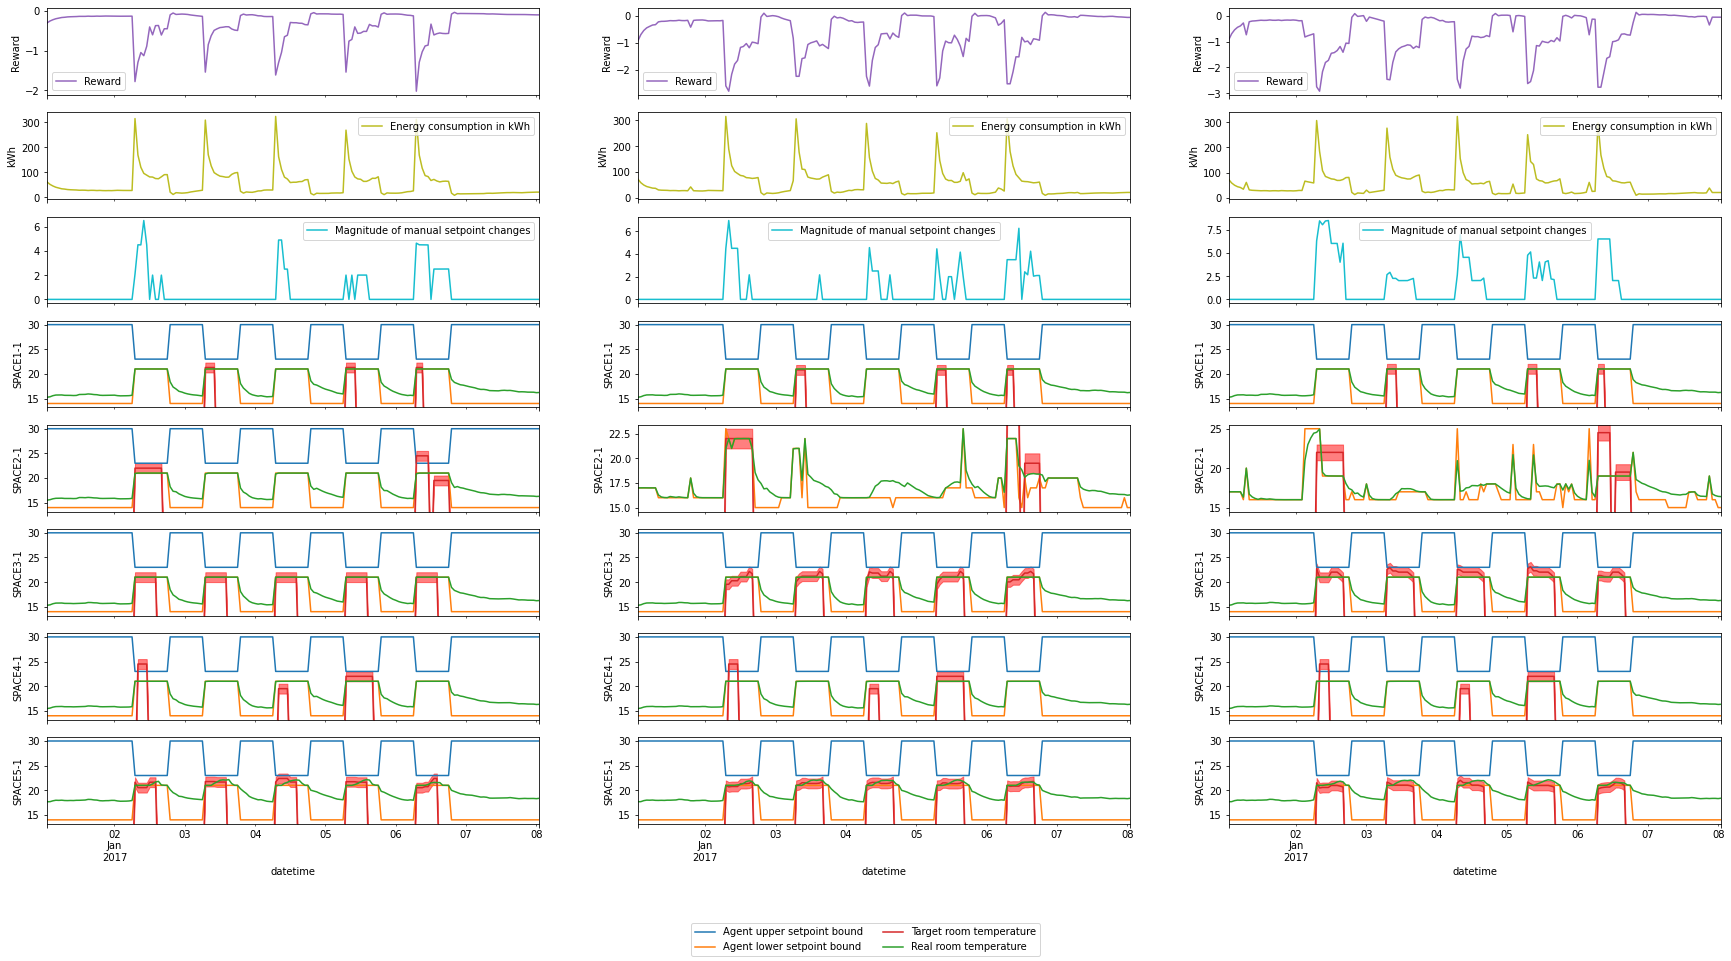

In [25]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a day</h3>

In [26]:
#selected_periods1    = [datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3)]
#selected_periods1_end= [datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4)]

In [27]:
if not "selected_periods1" in locals().keys():
    selected_periods1     = [datetime.datetime(2017, 1, 3) for _ in range(len(alldfs))]
if not "selected_periods1_end" in locals().keys():
    selected_periods1_end = [datetime.datetime(2017, 1, 4) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods1,
            selected_periods1_end)

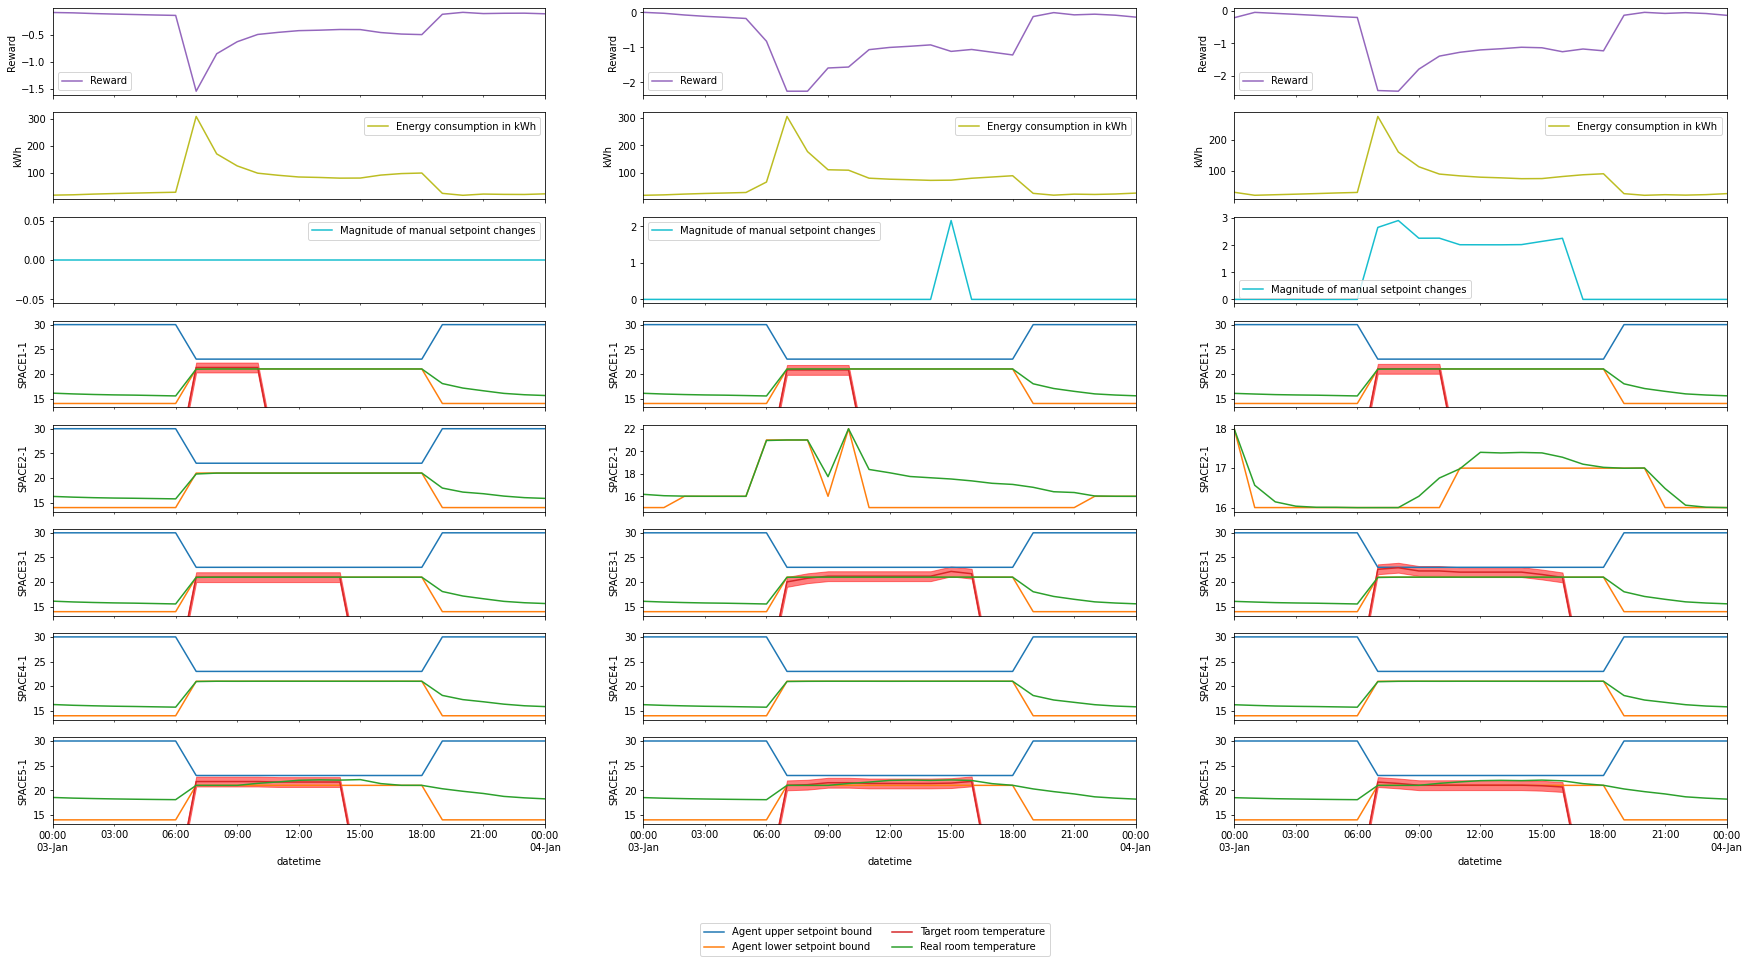

In [28]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a complete month</h3>

In [29]:
#selected_periods2    = [datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1)]

In [30]:
if not "selected_periods2" in locals().keys():
    selected_periods2     = [datetime.datetime(2017, 1, 1) for _ in range(len(alldfs))]
selected_periods2_end = [datetime.datetime(2017, 1, 30) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods2,
            selected_periods2_end)

For plot number 1, mean energy consumption =  51641.8 Wh, mean reward = -0.3167
For plot number 2, mean energy consumption =  51416.1 Wh, mean reward = -0.5429
For plot number 3, mean energy consumption =  51799.2 Wh, mean reward = -0.5996


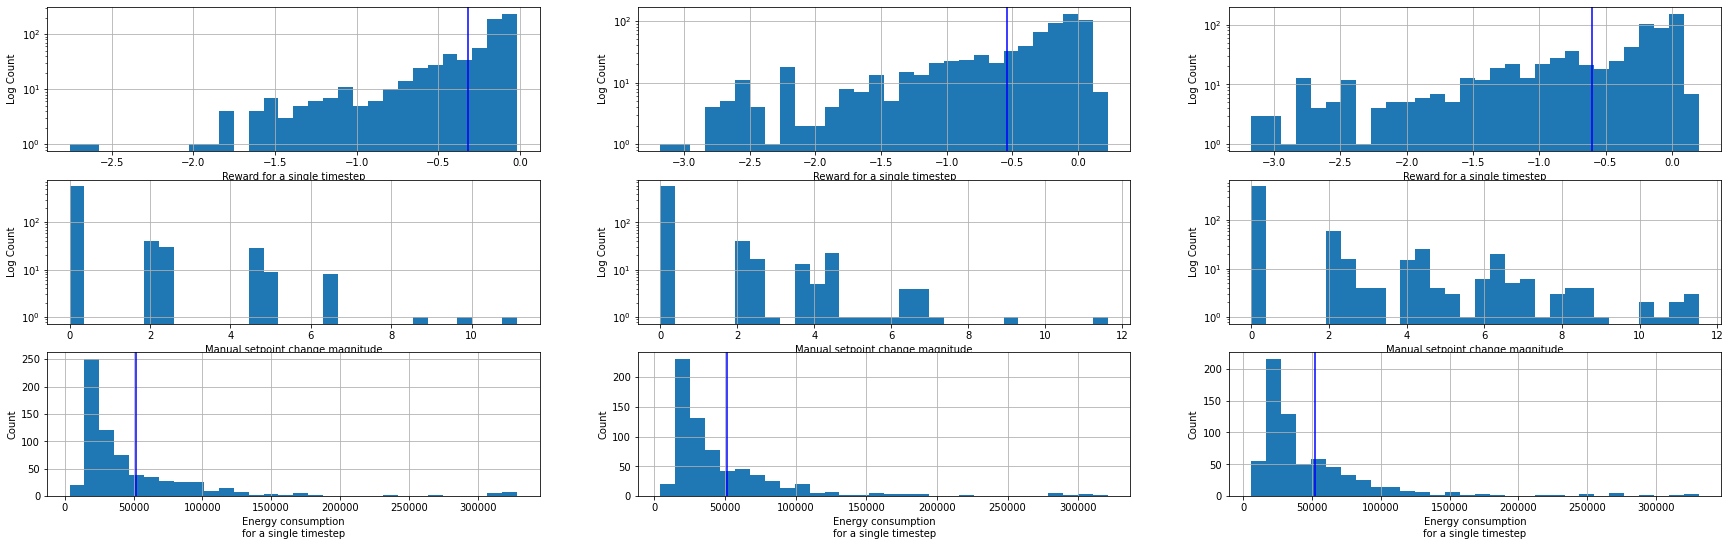

In [31]:
vh.plot_stpch_and_econs_distrib(subdfs, fig_width)

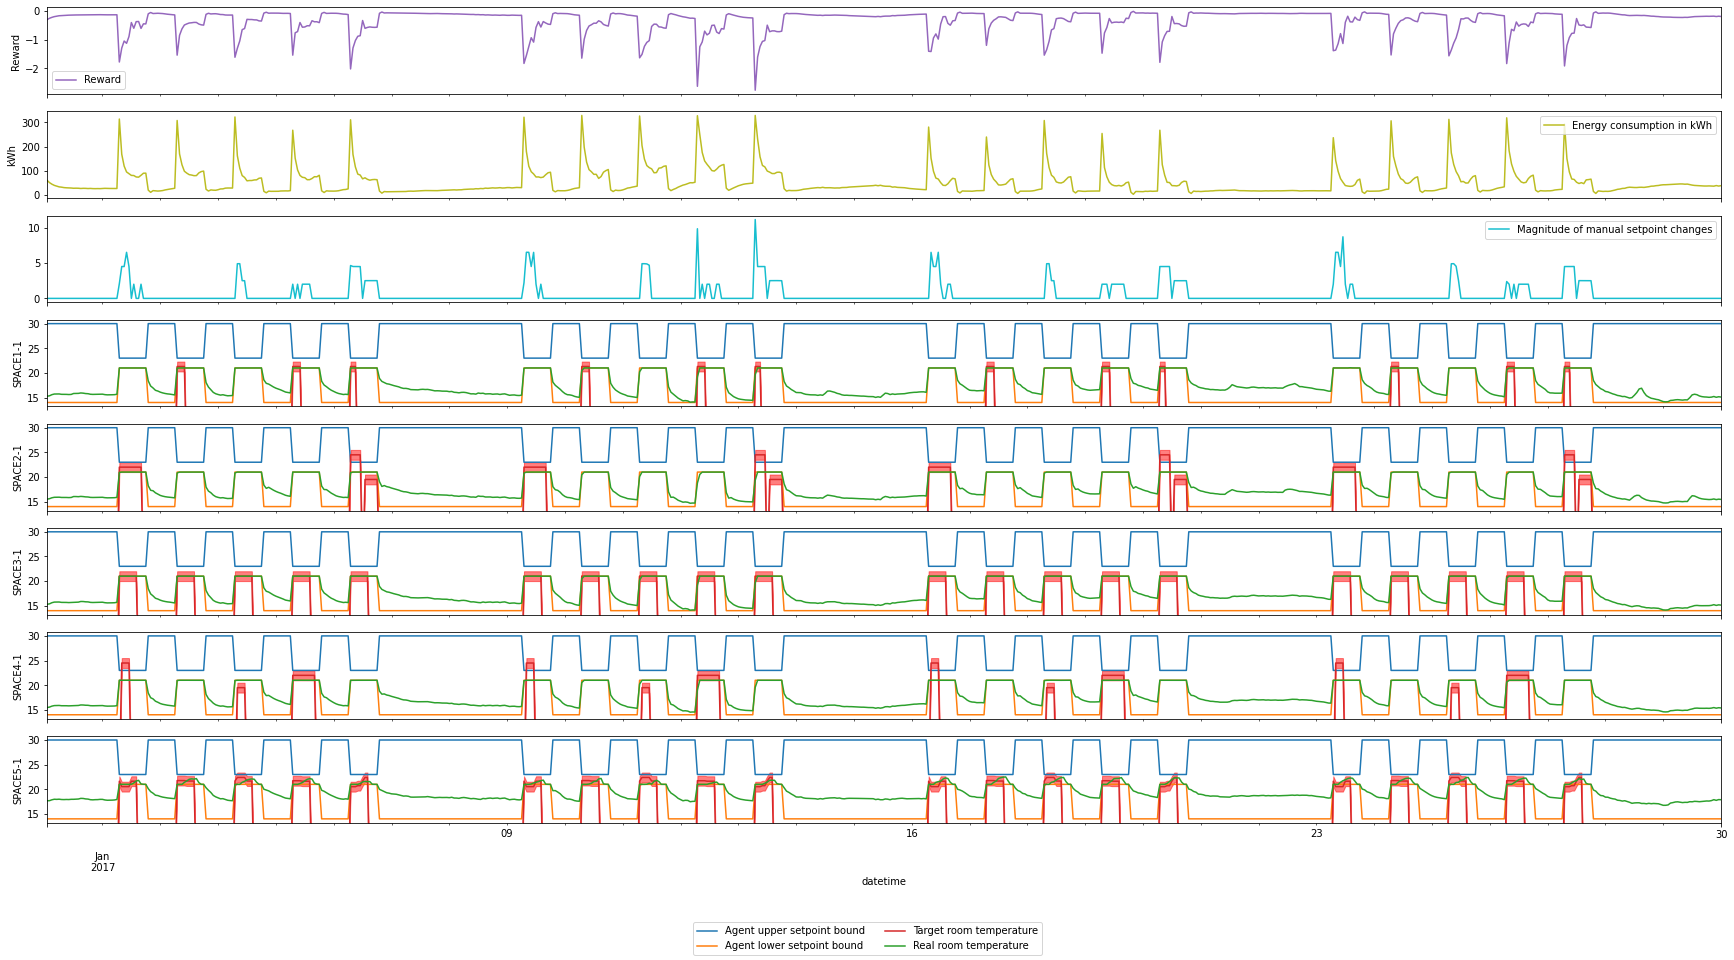

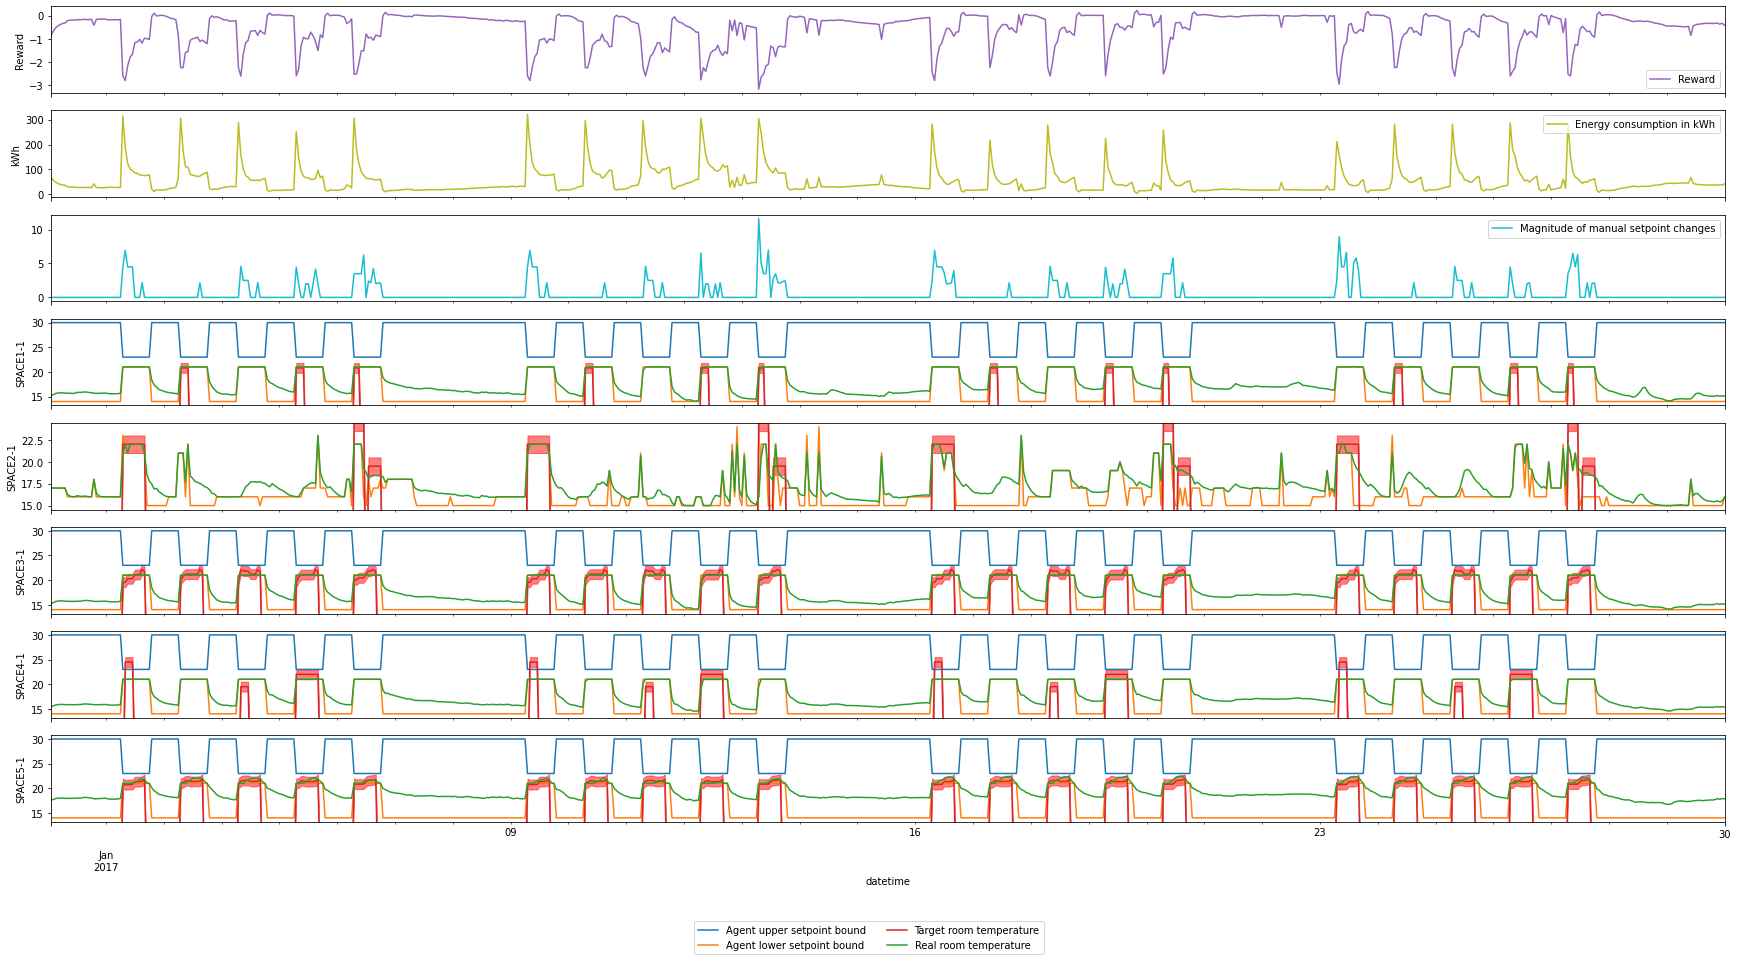

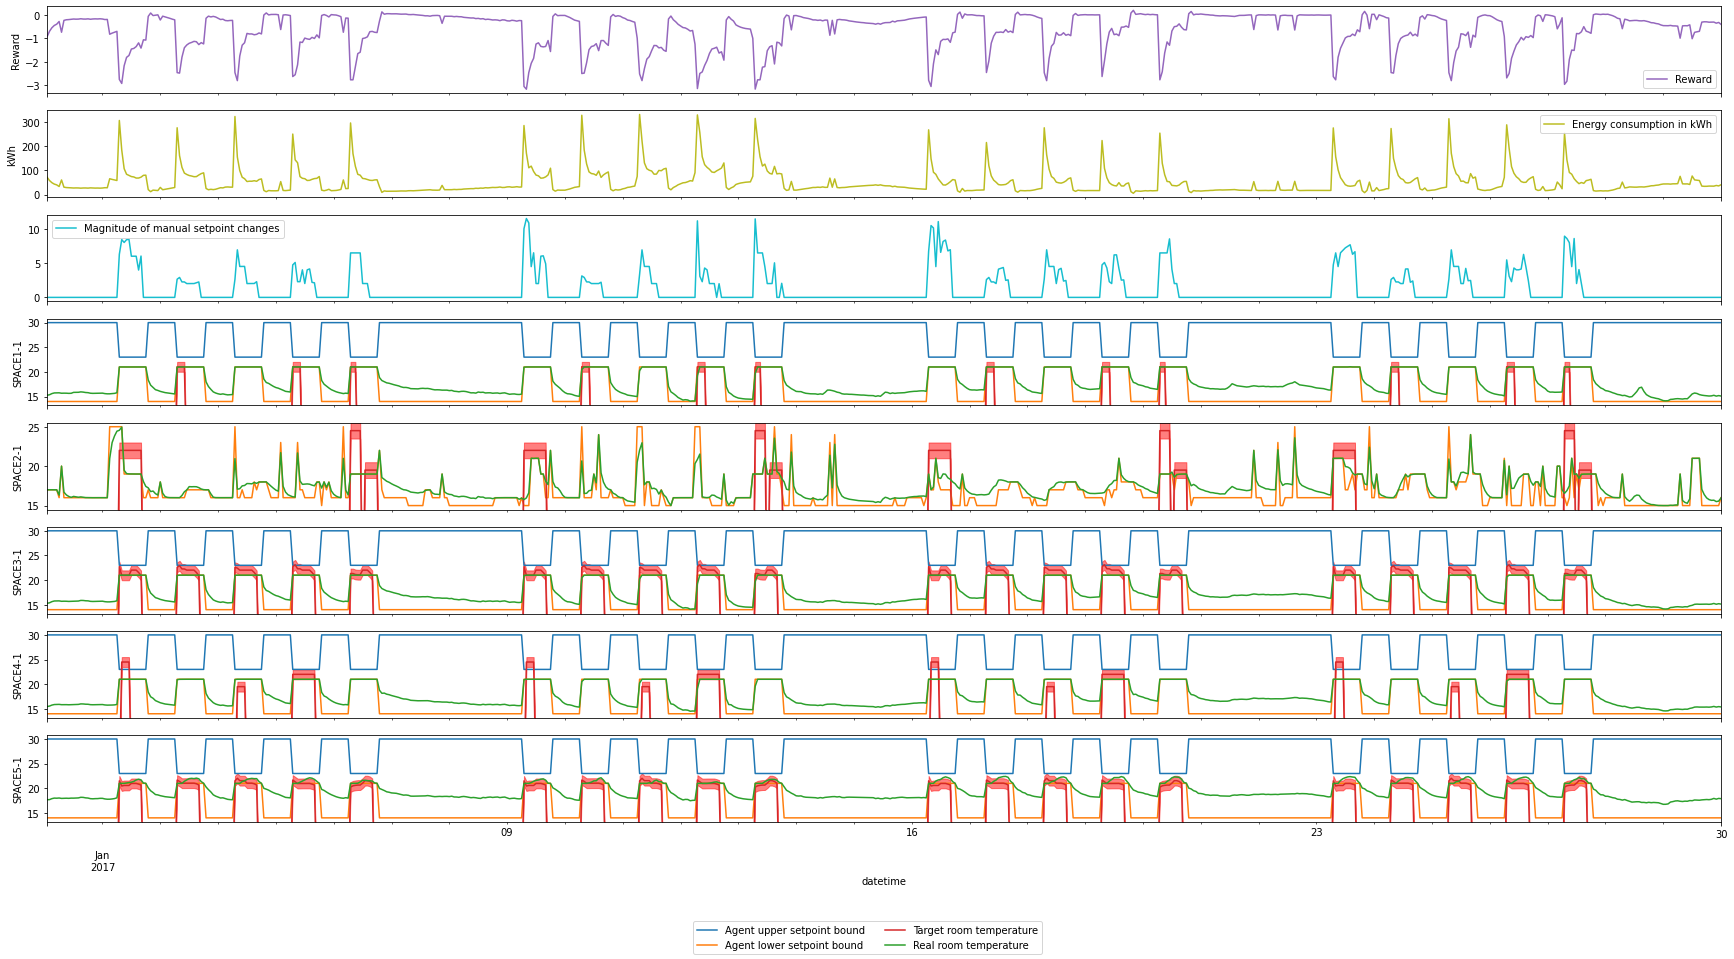

In [32]:
for idx, sdfs in enumerate(subdfs):
    p, _ = vh.complete_plot_total_overview(sdfs, fig_width,
                                           subdfs_rooms[idx],
                                           subdfs_agents[idx])
    p.show()

No q-values available for scenario 1: s308, agent 1
No q-values available for scenario 1: s308, agent 2
No q-values available for scenario 1: s308, agent 3
No q-values available for scenario 1: s308, agent 4
No q-values available for scenario 2: s308, agent 1
No q-values available for scenario 2: s308, agent 2
No q-values available for scenario 2: s308, agent 3
No q-values available for scenario 2: s308, agent 4


(<Figure size 2160x432 with 4 Axes>,
 array([<AxesSubplot:ylabel='Scenario 1: s308\nAgent 0'>,
        <AxesSubplot:ylabel='Scenario 2: s308\nAgent 0'>], dtype=object))

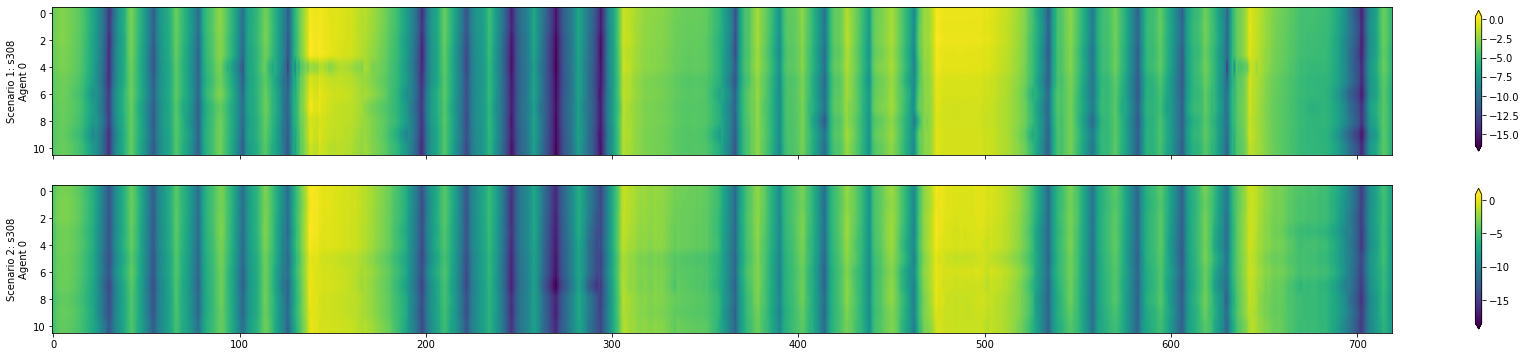

In [33]:
vh.plot_q_values(q_values, fig_width)